<a href="https://colab.research.google.com/github/ryo00427/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# %cd 以降にこのnotebookを置いているディレクトリを指定してください。
%cd "/content/drive/MyDrive"

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%precision 3

'%.3f'

In [3]:
df = pd.read_csv('/content/drive/MyDrive/baseboll_data/Team_Batting_Statistics.csv')
df.head()

,チーム,打 率,試 合,打 席,打 数,得 点,安 打,二塁打,三塁打,本塁打,...,盗塁刺,犠 打,犠 飛,四 球,故意四,死 球,三 振,併殺打,長打率,出塁率
0,DeNA,0.256,143,5393,4863,522,1246,243,15,101,...,27,85,31,360,38,54,922,114,0.375,0.313
1,巨 人,0.247,143,5350,4752,462,1172,211,16,81,...,25,125,28,409,37,36,972,89,0.349,0.309
2,中 日,0.243,143,5277,4796,373,1166,178,18,68,...,27,113,21,322,24,25,1046,106,0.330,0.293
3,ヤクルト,0.243,143,5343,4696,506,1141,171,8,103,...,16,137,32,436,31,42,1042,96,0.349,0.311
4,阪 神,0.242,143,5335,4694,485,1137,164,17,67,...,35,115,26,441,20,59,1028,120,0.327,0.314


In [4]:
df.columns = df.columns.str.replace('　', '')

In [5]:
df['チーム'] = df['チーム'].map({'巨人': 0, '阪神': 1, '広島': 2, '中日': 3, 'DeNA': 4, 'ヤクルト': 5})

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   チーム     2 non-null      float64
 1   打率      6 non-null      float64
 2   試合      6 non-null      int64  
 3   打席      6 non-null      int64  
 4   打数      6 non-null      int64  
 5   得点      6 non-null      int64  
 6   安打      6 non-null      int64  
 7   二塁打     6 non-null      int64  
 8   三塁打     6 non-null      int64  
 9   本塁打     6 non-null      int64  
 10  塁打      6 non-null      int64  
 11  打点      6 non-null      int64  
 12  盗塁      6 non-null      int64  
 13  盗塁刺     6 non-null      int64  
 14  犠打      6 non-null      int64  
 15  犠飛      6 non-null      int64  
 16  四球      6 non-null      int64  
 17  故意四     6 non-null      int64  
 18  死球      6 non-null      int64  
 19  三振      6 non-null      int64  
 20  併殺打     6 non-null      int64  
 21  長打率     6 non-null      float64
 22  出塁率   

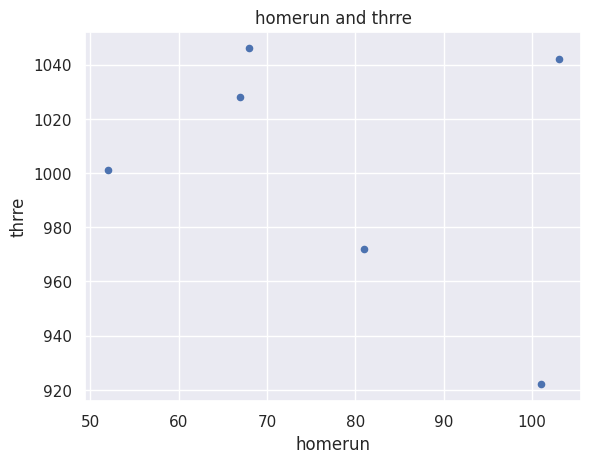

In [15]:
df.plot(
    x = '本塁打',
    y = '三振',
    kind='scatter',
    grid= True,
    xlabel='homerun',
    ylabel='thrre',
    title='homerun and thrre',
)
plt.show()

切片 (intercept): [-833.375]
傾き (coefficient): [5284.716]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

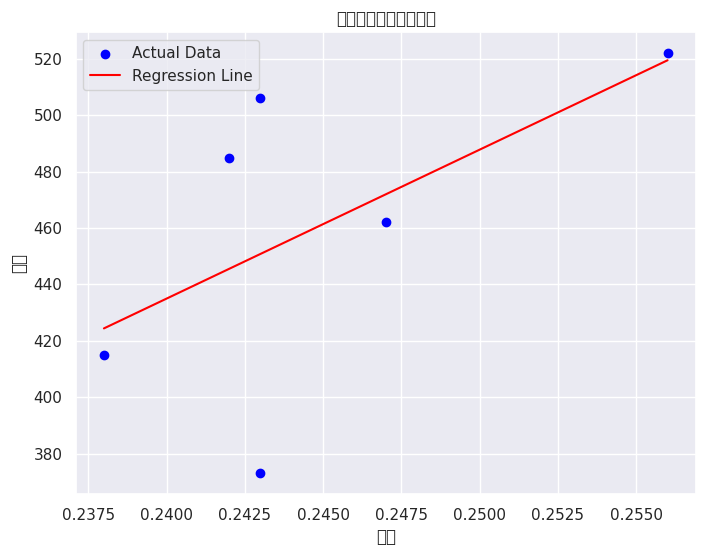

In [18]:
x = df[['打率']]
y = df[['得点']]

model = LinearRegression()

model.fit(x,y)
print(f"切片 (intercept): {model.intercept_}")
print(f"傾き (coefficient): {model.coef_[0]}")

# 予測
y_pred = model.predict(x)

# 散布図＋回帰直線を描画
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('打率と得点の回帰分析')
plt.xlabel('打率')
plt.ylabel('得点')
plt.legend()
plt.grid(True)
plt.show()
